## Import Libraries

In [88]:
import pandas as pd
import numpy as np
import random
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

## Import Data

In [2]:
df = pd.read_csv('E:\Everything Study\GWU\Sem 2\Visualization of Complex Data\Project\Electric_Vehicle_Population_Data.csv')
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,3C3CFFGE4E,Yakima,Yakima,WA,98902.0,2014,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,87,0,14.0,1593721,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10
1,5YJXCBE40H,Thurston,Olympia,WA,98513.0,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,2.0,257167501,POINT (-122.817545 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
2,3MW39FS03P,King,Renton,WA,98058.0,2023,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,11.0,224071816,POINT (-122.1298876 47.4451257),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,7PDSGABA8P,Snohomish,Bothell,WA,98012.0,2023,RIVIAN,R1S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,21.0,260084653,POINT (-122.1873 47.820245),PUGET SOUND ENERGY INC,5.306105e+10
4,5YJ3E1EB8L,King,Kent,WA,98031.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,33.0,253771913,POINT (-122.2012521 47.3931814),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


## Data Exploration

In [3]:
df.shape

(166800, 17)

In [4]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,166795.000000,166800.000000,166800.000000,166800.000000,166440.000000,1.668000e+05,1.667950e+05
mean,98173.713750,2020.341793,61.508993,1152.723171,29.178941,2.172420e+08,5.297709e+10
std,2442.584415,3.001465,93.271747,8661.081091,14.853534,7.727458e+07,1.569754e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.790741e+08,5.303301e+10
50%,98122.000000,2021.000000,0.000000,0.000000,33.000000,2.244045e+08,5.303303e+10
75%,98371.000000,2023.000000,84.000000,0.000000,42.000000,2.513421e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


For Electric Range, median is 0 and the 3rd quantile is 84, mean is 61.5. This indicates a heavy right skew and a possibility of outliers. We'll take a look at it during analysis.

In [5]:
df.describe(include='O')

,VIN (1-10),County,City,State,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Vehicle Location,Electric Utility
count,166800,166795,166795,166800,166800,166800,166800,166800,166790,166795
unique,10316,187,704,44,39,138,2,3,835,76
top,7SAYGDEE6P,King,Seattle,WA,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,POINT (-122.12302 47.67668),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
freq,1114,86594,27831,166440,74834,32822,130293,83517,4252,61337


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166800 entries, 0 to 166799
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         166800 non-null  object 
 1   County                                             166795 non-null  object 
 2   City                                               166795 non-null  object 
 3   State                                              166800 non-null  object 
 4   Postal Code                                        166795 non-null  float64
 5   Model Year                                         166800 non-null  int64  
 6   Make                                               166800 non-null  object 
 7   Model                                              166800 non-null  object 
 8   Electric Vehicle Type                              166800 non-null  object

In [7]:
df.isna().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 360
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

## Data Cleaning

We have `County`, `City`, `Postal Code` with just 5 missing values, which might all be the same. We'll take a look at it.
The `Legislative District` has 360 missing values, `Vehicle Location` has 10. `Electric Utility` and `2020 Census Tract` has 5.

In [9]:
df[df['County'].isna()]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
98,5YJXCAE24H,NaN,NaN,BC,NaN,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,NaN,159850029,NaN,NaN,NaN
100,5YJSA1E21J,NaN,NaN,AE,NaN,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249,0,NaN,220643132,NaN,NaN,NaN
132425,5YJ3E1EA5K,NaN,NaN,BC,NaN,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,475254825,NaN,NaN,NaN
140273,5YJRE11B48,NaN,NaN,BC,NaN,2008,TESLA,ROADSTER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,98950,NaN,143609049,NaN,NaN,NaN
154970,1N4AZ0CP1D,NaN,NaN,AP,NaN,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,NaN,112277063,NaN,NaN,NaN


The assumption was on point. Values of County, City and Postal Code are missing for the same 5 records. In fact, Vehicle Location, Electric utility and Census Tract are also missing for the same. Since a lot our analysis is going to deal with these features, let's remove these 5 records to begin with.

Apart from this Vehicle Location will have 5 more missing records. Let's remove those as well.

In [70]:
df_cleaned = df.dropna(subset=['County'])
df_cleaned = df.dropna(subset=['Vehicle Location'])

In [46]:
df_cleaned.isna().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 355
DOL Vehicle ID                                         0
Vehicle Location                                       0
Electric Utility                                       0
2020 Census Tract                                      0
dtype: int64

Legislative District has 355 missing value now. We won't be dealing with this feature, so let's keep these records as is.

In [9]:
df_cleaned['Electric Utility'].unique()

array(['PACIFICORP', 'PUGET SOUND ENERGY INC',
       'PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)',
       'CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)',
       'PUD NO 2 OF GRANT COUNTY', 'MODERN ELECTRIC WATER COMPANY',
       'AVISTA CORP', 'PUD NO 1 OF CHELAN COUNTY',
       'NO KNOWN ELECTRIC UTILITY SERVICE',
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA)',
       'BONNEVILLE POWER ADMINISTRATION||PUGET SOUND ENERGY INC||PUD NO 1 OF JEFFERSON COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF COWLITZ COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF KLICKITAT COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||PACIFICORP||BENTON RURAL ELECTRIC ASSN',
       'BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOHOMISH COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLALLAM COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||PACIFICORP||PUD NO 1 OF CLARK COUNTY - (WA)',
       'BONNEVILLE POWER ADMINISTRATION||CITY OF PORT ANGE

We have a few cases here:
1. Single value
2. Two values joined with |
3. Two values joined with ||
4. Three values joined with || and |
5. Multiple values joined with || and |

Here's what we'll do:\
Separate the values based on | and ||. \
For cases:
1. If they have a single values - do nothing.
2. If it had 2 values joined by | - Replace the value by randomly assigning any of the 2 values, because they are of the same type
3. If it had 2 values joined by || - Replace the value with the 1st value, because they are different type and first they fall under the 1st territory mentioned
4. If it had 3 values separated by || and |or|| - Replace with the 2nd value (The middle one), because it implies the coverage of the entire territory in the middle
5. if it had Multiple values joined with || and | - Replace by choosing randomly b/w the 2nd and the 3rd values, because it covers all of the territories in the middle.


In [71]:
def separate_values(value):
    all_values = []

    if '|' in value and '||' not in value:
        # Case 2: Two values joined by |
        return random.choice(value.split('|'))
    elif '||' in value:
        values = value.split('||')
        if not any('|' in x for x in values):
            if len(values) == 2:
                # Case 3: Two values joined by ||
                return values[0]
        else:
            # Case 4: Three values separated by || and |
            for x in values:
                all_values.extend(re.split(r'\|+|\|\|+', x))
            if len(all_values) == 3:  # total length will be 3 values
                return all_values[1]  # Returning the middle value
            # Case 5: Multiple values joined with || and |
            return random.choice([all_values[1], all_values[2]])  # Returning either 2nd/3rd element
    else:
        # Case 1: Single value
        return value

df_cleaned['Electric Utility'] = df_cleaned['Electric Utility'].apply(separate_values)
df_cleaned['Electric Utility'].nunique()

C:\Users\sajan\AppData\Local\Temp/ipykernel_10860/4240917425.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Electric Utility'] = df_cleaned['Electric Utility'].apply(separate_values)


34

In [78]:
df_cleaned['Electric Utility'].value_counts()

PUGET SOUND ENERGY INC                   98811
BONNEVILLE POWER ADMINISTRATION          18574
CITY OF TACOMA - (WA)                    15600
CITY OF SEATTLE - (WA)                   14796
PACIFICORP                                1245
MODERN ELECTRIC WATER COMPANY             1059
PUD NO 1 OF CHELAN COUNTY                  989
PUD NO 2 OF GRANT COUNTY                   530
AVISTA CORP                                372
NON WASHINGTON STATE ELECTRIC UTILITY      355
PUD NO 1 OF DOUGLAS COUNTY                 335
NO KNOWN ELECTRIC UTILITY SERVICE          222
ELMHURST MUTUAL POWER & LIGHT CO           216
CITY OF CENTRALIA - (WA)                   206
CITY OF BLAINE - (WA)                      186
OKANOGAN COUNTY ELEC COOP, INC             139
PUD NO 1 OF OKANOGAN COUNTY                 98
CITY OF MILTON - (WA)                       85
TOWN OF STEILACOOM                          80
LAKEVIEW LIGHT & POWER                      77
PUD NO 1 OF PEND OREILLE COUNTY             56
PARKLAND LIGH

So, we have 34 different electric utility categories now. This is still a lot and the top 4 categories have way highers counts than the rest. Therefore, in our analysis we'll only use the top subset of categories.

In [73]:
df_cleaned['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Not eligible due to low battery range',
       'Eligibility unknown as battery range has not been researched'],
      dtype=object)

In [74]:
# Rename the column
df_cleaned.rename(columns={'Clean Alternative Fuel Vehicle (CAFV) Eligibility': 'CAFV Eligibility'}, inplace=True)

# Mapping feature name and values
mapping = {'Clean Alternative Fuel Vehicle Eligible': 'Eligible', 
           'Not eligible due to low battery range': 'Not eligible', 
           'Eligibility unknown as battery range has not been researched': 'Unknown'}
# Replace values
df_cleaned['CAFV Eligibility'].replace(mapping, inplace=True)

C:\Users\sajan\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\sajan\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [75]:
df_cleaned['Electric Vehicle Type'].unique()

array(['Battery Electric Vehicle (BEV)',
       'Plug-in Hybrid Electric Vehicle (PHEV)'], dtype=object)

In [76]:
evt_mapping = {'Battery Electric Vehicle (BEV)': 'Battery EV', 
           'Plug-in Hybrid Electric Vehicle (PHEV)': 'Plug-in Hybrid EV'}

df_cleaned['Electric Vehicle Type'].replace(evt_mapping, inplace=True)

## Analysis & Insights

#### 1.  What is the distribution of electric vehicles across different counties and cities and are there any notable patterns or concentrations? 

#### 2. What is the relationship between the Electric Vehicle type, CAFV eligibility and the Electric Utility? 

Since our `Electric Utility` feature has 34 different categories, let's visualize the top 10 and filter the top 5 for our analysis

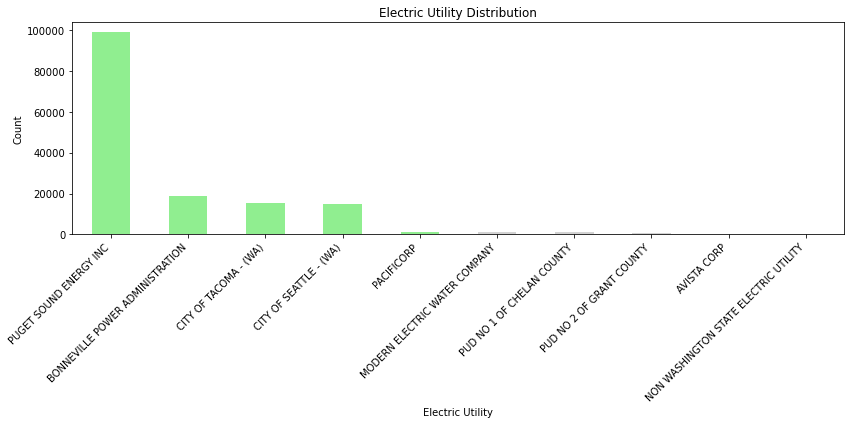

In [85]:
# Count the occurrences of each electric utility
electric_utility_counts = df_cleaned['Electric Utility'].value_counts()

# Sort the counts in descending order
electric_utility_counts_sorted = electric_utility_counts.sort_values(ascending=False)

# Extract top 5 electric utilities and their counts
top_5_utilities = electric_utility_counts_sorted.head(5)

# Plot the bar chart
plt.figure(figsize=(12, 6))
bar_colors = ['lightgrey' if utility not in top_5_utilities else 'lightgreen' for utility in electric_utility_counts_sorted.index]
electric_utility_counts_sorted.head(10).plot(kind='bar', color=bar_colors)
plt.title('Electric Utility Distribution')
plt.xlabel('Electric Utility')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [100]:
top_5_data.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type', 'CAFV Eligibility',
       'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [99]:
top_5_utilities = df_cleaned['Electric Utility'].value_counts().head(5).index

# Filter the DataFrame for the top 5 electric utilities
df_top_5 = df_cleaned[df_cleaned['Electric Utility'].isin(top_5_utilities)]
grouped_data = df_top_5.groupby(['Electric Utility', 'Electric Vehicle Type', 'CAFV Eligibility']).size().reset_index(name='Count')

# Create source, target, and value lists for Sankey diagram
sources = []
targets = []
values = []

for index, row in grouped_data.iterrows():
    sources.append(row['Electric Utility'])
    targets.append(row['Electric Vehicle Type'])
    values.append(row['Count'])
    
    targets.append(row['CAFV Eligibility'])
    sources.append(row['Electric Vehicle Type'])
    values.append(row['Count'])

# Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=["Electric Utility"] * len(df_cleaned['Electric Utility'].unique()) +
              ["Electric Vehicle Type"] * len(df_cleaned['Electric Vehicle Type'].unique()) +
              ["CAFV Eligibility"] * len(df_cleaned['CAFV Eligibility'].unique()),
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    )
)])

# Update layout
fig.update_layout(title_text="Sankey Diagram - Electric Vehicle Flow",
                  font_size=10)

# Show plot
fig.show()

#### 3. What insights can we gain about the future of electric mobility by examining the data on newer models and their technological features? For instance, how are factors like electric range and Electric vehicle type evolving with advancements in electric vehicle technology?

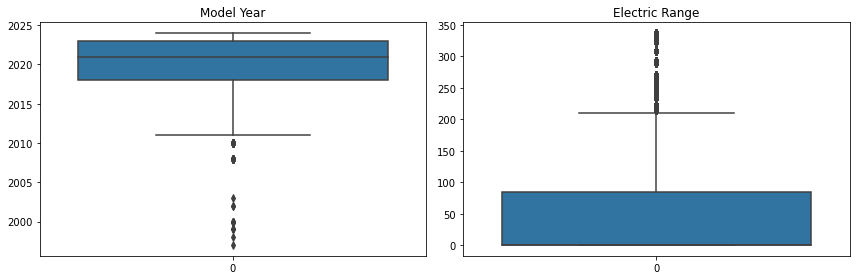

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes = axes.flatten()
for i, column in enumerate(['Model Year', 'Electric Range']):
    sns.boxplot(data=df_cleaned[column], ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

Well, the plot shows a lot of outliers in both the features. The boxplot for Model Year indicates that majority of production of EV was around 2020, and a few exist as early as 2000. It seems plausible, let's keep this data since it could lead to some good analysis.\
Electric range on the other hand (as predicted), has a lot of values in the lower range. Well this could indicate that most general purpose EVs have electric range in that range, and there are certain higher end Vehicles that offer a huge electric range. My assumption is that some of the newer models possess the capability of superior electric range. We'll see what it is in our analysis ahead.